# Project: Wrangling and Analyze Data

## TOC

<ul>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#issues">General Issues Observations</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#analyze">Analyzing and Visualizing Data</a></li>
</ul>


<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Importing necessary libraries and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

In [2]:
# Loading the twitter_archive_enhanced.csv into a pandaas dataframe
df_archive = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')

In [3]:
# Checking to see if the twitter_archive_enhanced.csv dataset was properly loaded
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

Obviously the twitter_archive_enhanced.csv dataset was successfully loaded as pandas dataframe

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# downloading the image prediction dataset using the Requests library earlier imported 
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as outfile:
  outfile.write(response.content)

In [5]:
# Loading the downloaded image predictions dataset into a pandas dataframe
df_img_pred = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
# Checking to see if the image predictions dataset was properly loaded
df_img_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

As shown above, the image_predictions.tsv dataset was successfully loaded as pandas dataframe

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
'''
I was unable to get my twitter developer account activated by twitter, so I opted for the alternative as given by Udacity. Hence the twitter_json file as well as the lines of code given in the additional resoiurces section of the classroom was adopted by me.
'''

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# Finding the length of the tweet ids in the twitter_archive.csv dataset with code as given in the classroom

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

There are 2356 tweet ids in the twitter_archive.csv dataset and apparently will be the number of rows prresent in the dataset

In [9]:
"""# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)"""

'# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)'

In [10]:
# Create an empty list to load data line by line into it
list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as outfile:
    for line in outfile:
        data = json.loads(line)
        list.append(data)

In [11]:
list

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [12]:
# Writing each lines in the list as a dataframe however limiting the columns needed to 'id', 'created_at', 'retweet_count', 'favorite_count' as required
df = pd.DataFrame(list, columns = list[0].keys())
df_tweet = df[['id', 'favorite_count', 'retweet_count']]

In [13]:
# Checking the df_tweet dataframe to see if it's properly written
df_tweet.head()

id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

In [14]:
# Renaming the columns of the df_tweet dataframe as instructed in the 'Gathering Data' section of the classroom
#df_tweet.rename(columns = {'id':'tweet ID', 'created_at':'date', 'retweet_count':'retweet count', 'favorite_count':'favourite count'}, inplace = True)

In [15]:
df_tweet.head()

id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

Beautiful! The data has been loaded and renamed successfully!

<a id='assess'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Accessing the Datasets Visually

1. twitter_archived.csv dataset (i.e the dataset named df_archive)

In [16]:
df_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [17]:
df_archive.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [18]:
df_img_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [19]:
df_img_pred.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [20]:
df_tweet.head()

id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

In [21]:
df_tweet.tail()

id  favorite_count  retweet_count
2349  666049248165822465             111             41
2350  666044226329800704             311            147
2351  666033412701032449             128             47
2352  666029285002620928             132             48
2353  666020888022790149            2535            532

### Accessing the Datasets Programmatically

#### 1. twitter_archived.csv dataset (i.e the dataset named df_archive)

In [22]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
df_archive['timestamp'].dtype

dtype('O')

In [24]:
df_archive.name.dtype

dtype('O')

In [25]:
df_archive.name.value_counts(sort = True, ascending = False).head(10)

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
Cooper      11
Penny       10
Tucker      10
Lola        10
Bo           9
Name: name, dtype: int64

In [26]:
df_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [27]:
# Let's check  the list of the names that are not proper nouns in the name column
error_name_list = []
error = df_archive[df_archive.name.str.islower() == True]['name'].unique()
error_name_list.append(error)

In [28]:
print(error_name_list)

[array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)]


In [29]:
df_archive.doggo.dtype

dtype('O')

In [30]:
df_archive.floofer.dtype

dtype('O')

In [31]:
df_archive.pupper.dtype

dtype('O')

In [32]:
df_archive.puppo.dtype

dtype('O')

In [33]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Obviously, all tweets come from 4 major sources. Viz:
1. Twitter for iPhone
2. Vine - Make a Scene
3. Twitter Web Client
4. TweetDeck


In [34]:
df_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [35]:
df_archive.duplicated().sum()

0

In [36]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [37]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

#### 2. Image prediction dataset

In [38]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
df_img_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [40]:
df_img_pred.duplicated().sum()

0

In [41]:
df_img_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [42]:
df_img_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [43]:
df_img_pred.tweet_id.dtype

dtype('int64')

In [44]:
df_img_pred.p1.dtype

dtype('O')

#### 3. Tweet JSON dataset

In [45]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [46]:
df_tweet.describe()

id  favorite_count  retweet_count
count  2.354000e+03     2354.000000    2354.000000
mean   7.426978e+17     8080.968564    3164.797366
std    6.852812e+16    11814.771334    5284.770364
min    6.660209e+17        0.000000       0.000000
25%    6.783975e+17     1415.000000     624.500000
50%    7.194596e+17     3603.500000    1473.500000
75%    7.993058e+17    10122.250000    3652.000000
max    8.924206e+17   132810.000000   79515.000000

In [47]:
df_tweet.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

In [48]:
sum(df_tweet.duplicated())

0

<a id='issues'></a>
## General Issues Observations

##### * twitter_archive_enhanced
1. timestamp column is in the object dtype instead of datetime
2. text column is in the object dtype instead of string
3. According to the information given in 'Project Moltivation' section, the Dogtionary explanation states that doggo, pupper, puppo, and floof(er) are all the various stages of dog. However, they are all separated into different columns in the twitter_archive_enhanced.csv dataset instead of a single column.
4. The four dog stages are all in the object dtype instead of strings
5. The name column is of object dtype in stead of strings
6. The name column contains some entries that are not names in the the real sense. E.g None, a, an, etc. Meanwhile,  the real names has a pattern of Proper nouns. That is, their initial letter is being capitalised
7. there are 181 retweeted_status_id in the archive dataset. Hence, there are 181 retweets in the dataset
8. The text column of Retweeted tweets contain the RT @ character. However, other tweets which are original don't have the RT @ character
9. The following are columns with null values and their corresponding number of missing values:        
            COLUMNS NAME              MISSING VALUES
        in_reply_to_status_id:         2278
        in_reply_to_user_id:           2278
        retweeted_status_id:           2175
        retweeted_status_user_id:      2175
        retweeted_status_timestamp:    2175
        expanded_urls:                 59
10. The sources of each tweets in the 'source' column are embeded into an href tag

##### * image_prediction
1. the column names p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, and p3_dog are confusing as the are not descriptive enough to be understood. Hence they should be renamed


2. According to the description of the prediction dataset in the product motivation section,

    p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
    p1_conf is how confident the algorithm is in its #1 prediction → 95%
    p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
    p2 is the algorithm's second most likely prediction → Labrador retriever
    p2_conf is how confident the algorithm is in its #2 prediction → 1%
    p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
    etc.
    
    Hence, we can summarily conclude that columns p1, p2 and p3 contain the same kind of data which can be grouped as predictions. The columns p1_conf, p2_conf and p3_conf can also be grouped as prediction confidence, and columns p1_dog, p2_dog and p3_dog are boolean columns that shows whether the prediction is a dog type. They needs to be combined into three categories. Viz: p-series as Predictions, P_conf series as prediction confidence and the p_dog series as dog breed prediction.

##### * tweet_json
1. the tweet_json dataset has no null values
2. id column has integer dtype intstead of string
3. created_at column has object dtype instead of datetime
4. the name given to date in tweet_json column is different from that of twitter_archive_enhanced. this needs to be changed before merging
2. the tweet id column name of tweet_json is different from it's corresponding name in the other two datasets, it's 'id' in tweet_json whereas 'tweet_id' in other two. This need to be changed since the three datasets will still need to be merged.

### Quality issues

1. timestamp column is in the object dtype instead of datetime

2. The name column contains some entries that are not names in the the real sense. E.g None, a, an, etc. Meanwhile, the real names has a pattern of Proper nouns. That is, their initial letter is being capitalised. It's better to replace them with 'None'

3. the column names p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, and p3_dog are confusing as they are not descriptive enough to be understood. Hence let's make them descriptive by renaming them.

4. id column in all the datasets have integer dtype intstead of string

5. The source column in twitter_archive_enhanced is ambiguous as it's values are being embedded into an html tag. this needs to be cleaned

6. the tweet id column name of tweet_json is different from it's corresponding name in the other two datasets, it's 'id' in tweet_json whereas 'tweet_id' in other two. This need to be changed to enhance consistency in column names across all dataset.

7. The four dog stages are all in the object dtype instead of strings even after they've been combined

8. The p1, p2, p3, columns in image prrediction dataset cuntains underscores and some valuesd starts with capital letter
9. There are about 181 retweets and since as instructed retweets are not needed, they need to be removed

### Tidiness issues
1. As observed earlier the four stages of dog are all separated into different columns in the twitter_archive_enhanced.csv dataset instead of a single column. This needs to be combined

2. The twiiter_archive_enhanced data and the tweet_json dataset have similar attributes henced they should be merged as one  dataset

3. They needs to be combined into three categories. Viz: p-series as Predictions, P_conf series as prediction confidence and the p_dog series as dog breed prediction.

<a id='clean'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [49]:
# Make copies of original pieces of data
df_archive_copy = df_archive.copy()
df_img_pred_copy = df_img_pred.copy()
df_tweet_copy = df_tweet.copy()

Check if each of the datasets was successfully copied

In [50]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [51]:
df_img_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


A copy of each of the three datasets has been successfully made!

### Quality Issue #1:

#### Define:
Change the timestamp data type from object type to datetime

#### Code

In [53]:
df_archive_copy.timestamp = pd.to_datetime(df_archive_copy.timestamp)

#### Test

In [54]:
df_archive_copy.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Quality Issue #2:

#### Define
Replace all the words contained in error_name_list with None

#### Code

In [55]:
for value in error_name_list:
    df_archive_copy['name'].replace(value, 'None', inplace = True)

#### Test

In [56]:
df_archive_copy['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooe

In [57]:
df_archive_copy.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

### Quality Issue #3:

#### Define

Solve the ambiguity in the source column of the twitter_axrchive_enhanced datases by simply extracting and replacing each source with their respective display strings.

#### Code

In [58]:
df_archive_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Obviously, all tweets come from 4 major sources. Viz:
1. Twitter for iPhone
2. Vine - Make a Scene
3. Twitter Web Client
4. TweetDeck


In [59]:
df_archive_copy['source'] = df_archive_copy['source'].str.extract('^<a.+>(.+)</a>$')

In [60]:
df_archive_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp              source  \
0 2017-08-01 16:23:56  Twitter for iPhone   
1 2017-08-01 00:17:27  Twitter for iPhone   
2 2017-07-31 00:18:03  Twitter for iPhone   
3 2017-07-30 15:58:51  Twitter for iPhone   
4 2017-07-29 16:00:24  Twitter for iPhone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

### Quality Issue #4:

#### Define:
drop all retweets


#### Code

In [61]:
retweets = df_archive_copy[df_archive_copy['retweeted_status_id'].notnull()].index

In [62]:
df_archive_copy.drop(retweets, inplace = True)

In [63]:
reply = df_archive_copy[df_archive_copy['in_reply_to_status_id'].notnull()].index

In [64]:
df_archive_copy.drop(reply, inplace = True)

#### Test

In [65]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

In [66]:
df_archive_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

In [67]:
df_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

In [68]:
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Quality Issue #5:

#### Define:

Categorize and rename the p1, p2, p3 as predictions column, p1_conf, p2_conf, p3_conf, as prediction confidence column, p1_dog, p2_dog, and p3_dog , as dog predicted


#### Code

In [69]:
df_img_pred_copy.rename(columns = {'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction', 'p1_conf':'fisrt_prediction_confidence', 'p2_conf':'second_prediction_confidence', 'p3_conf':'third_prediction_confidence', 'p1_dog':'first_predicted_dog', 'p2_dog':'second_predicted_dog', 'p3_dog':'third_predicted_dog'}, inplace = True)

#### Test

In [70]:
df_img_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2075 non-null int64
jpg_url                         2075 non-null object
img_num                         2075 non-null int64
first_prediction                2075 non-null object
fisrt_prediction_confidence     2075 non-null float64
first_predicted_dog             2075 non-null bool
second_prediction               2075 non-null object
second_prediction_confidence    2075 non-null float64
second_predicted_dog            2075 non-null bool
third_prediction                2075 non-null object
third_prediction_confidence     2075 non-null float64
third_predicted_dog             2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality Issue #6:

#### Define:

Change the underscores characters in p1, p2, p3 columns to space and Capitalise the first words

#### Code

In [71]:
# Replace the underscores with space
df_img_pred_copy['first_prediction'] = df_img_pred_copy['first_prediction'].str.replace('_', ' ')
df_img_pred_copy['second_prediction'] = df_img_pred_copy['second_prediction'].str.replace('_', ' ')
df_img_pred_copy['third_prediction'] = df_img_pred_copy['third_prediction'].str.replace('_', ' ')

In [72]:
# Capitalise the first letter
df_img_pred_copy['first_prediction'] = df_img_pred_copy['first_prediction'].str.capitalize()
df_img_pred_copy['second_prediction'] = df_img_pred_copy['second_prediction'].str.capitalize()
df_img_pred_copy['third_prediction'] = df_img_pred_copy['third_prediction'].str.capitalize()

#### Test

In [73]:
df_img_pred_copy.head(100)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20  666287406224695296  https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22  666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23  666345417576210432  https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24  666353288456101888  https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25  666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26  666373753744588802  https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27  666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28  666407126856765440  https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29  666411507551481857  https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
..                 ...                                              ...   
70  667192066997374976  https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg   
71  667200525029539841  https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg   
72  667211855547486208  https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg   
73  667369227918143488  https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg   
74  667393430834667520  https://pbs.twimg.com/media/CUMOyd3XIAAl13H.jpg   
75  667405339315146752  https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg   
76  667435689202614272  https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg   
77  667437278097252352  https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg   
78  667443425659232256  https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg   
79  667453023279554560  https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg   
80  667455448082227200  https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg   
81  667470559035432960  https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg   
82  667491009379606528  https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg   
83  667495797102141441  https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg   
84  667502640335572993  https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg   
85  667509364010450944  https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg   
86  667517642048163840  https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg   
87  667524857454854144  https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg   
88  667530908589760512  https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg   
89  667534815156183040  https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg   
90  667538891197542400  https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg   
91  667544320556335104  https://pbs.twi

### Quality Issue #7:

#### Define:

Rename the 'id' column in tweet_json file to 'tweet_id' as seen in the other 2 datasets

#### Code

In [74]:
df_tweet_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [75]:
df_tweet_copy.head()


tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

### Quality Issue #8:

#### Define:

Convert the tweet_id columns from object dtype to strings

#### Code

In [76]:
df_archive_copy.tweet_id = df_archive_copy.tweet_id.astype('str')
df_img_pred_copy.tweet_id = df_img_pred_copy.tweet_id.astype('str')
df_tweet_copy.tweet_id = df_tweet_copy.tweet_id.astype('str')

#### Test

In [77]:
# Checking to see if the 'tweet_id' data type of the archive dataset has be changed from int to string successfuly
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 213.0+ KB


In [78]:
# Checking to see if the 'tweet_id' data type of the image prediction dataset has be changed from int to string successfuly
df_img_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                        2075 non-null object
jpg_url                         2075 non-null object
img_num                         2075 non-null int64
first_prediction                2075 non-null object
fisrt_prediction_confidence     2075 non-null float64
first_predicted_dog             2075 non-null bool
second_prediction               2075 non-null object
second_prediction_confidence    2075 non-null float64
second_predicted_dog            2075 non-null bool
third_prediction                2075 non-null object
third_prediction_confidence     2075 non-null float64
third_predicted_dog             2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [79]:
# Checking to see if the 'tweet_id' data type of the tweet_json dataset has be changed from int to string successfuly
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidiness Issue #1:

#### Define:

Combine the four separate dog stages into one column named dog_stages

#### Code

In [80]:
# Generate a list containing only the doggo dog stage
doggo_list = []
for values in df_archive_copy['doggo']:
    doggo_list.append(values)

In [81]:
# check the values in the doggo_list generated from the archive dataset
print(doggo_list)

['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'doggo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'doggo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'doggo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'doggo', 'doggo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'doggo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', '

In [82]:
# Generate a list containing only the puppo dog stage
puppo_list = []
for values in df_archive_copy['puppo']:
    puppo_list.append(values)
    

In [83]:
# Print the values in the puppo_list generated from the archive dataset
print(puppo_list)

['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'puppo', 'None', 'puppo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'puppo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'puppo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'puppo', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'N

In [84]:
# Generate a list containing only the floofer dog stage
floofer_list = []
for values in df_archive_copy['floofer']:
    floofer_list.append(values)
    

In [85]:
# check the values in the floofer_list generated from the archive dataset
print(floofer_list)

['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'floofer', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'Non

In [86]:
# check the count of the value in the floofer dog stage in the archive dataset
df_archive_copy.floofer.value_counts()

None       2087
floofer      10
Name: floofer, dtype: int64

In [87]:
# check the count of the value in the puppo dog stage in the archive dataset
df_archive_copy.puppo.value_counts()

None     2073
puppo      24
Name: puppo, dtype: int64

In [88]:
# check the count of the value in the doggo dog stage in the archive dataset
df_archive_copy.doggo.value_counts()

None     2014
doggo      83
Name: doggo, dtype: int64

In [89]:
# check the count of the value in the pupper dog stage in the archive dataset
df_archive_copy.pupper.value_counts()

None      1867
pupper     230
Name: pupper, dtype: int64

In [90]:
"""Write a function that will generate a list of all the dog stages that were separated as different columns"""

def stages(value):
    dog_stages_list = []
    if value.doggo == 'doggo':
        dog_stages_list.append('doggo')
    if value.floofer == 'floofer':
        dog_stages_list.append('floofer')
    if value.pupper == 'pupper':
        dog_stages_list.append('pupper')
    if value.puppo == 'puppo':
        dog_stages_list.append('puppo')
    if not dog_stages_list:
        return 'None'
    else:
        return ','.join(dog_stages_list)

In [91]:
# Add the generated list as new column to the archive dataset
stages = df_archive_copy.apply(lambda value: stages(value), axis = 1)
df_archive_copy['dog_stages'] = stages

#### Test

In [92]:
df_archive_copy.head(100)

tweet_id           timestamp              source  \
0    892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1    892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2    891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3    891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4    891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   
5    891087950875897856 2017-07-29 00:08:17  Twitter for iPhone   
6    890971913173991426 2017-07-28 16:27:12  Twitter for iPhone   
7    890729181411237888 2017-07-28 00:22:40  Twitter for iPhone   
8    890609185150312448 2017-07-27 16:25:51  Twitter for iPhone   
9    890240255349198849 2017-07-26 15:59:51  Twitter for iPhone   
10   890006608113172480 2017-07-26 00:31:25  Twitter for iPhone   
11   889880896479866881 2017-07-25 16:11:53  Twitter for iPhone   
12   889665388333682689 2017-07-25 01:55:32  Twitter for iPhone   
13   889638837579907072 2017-07-25 00:10:02  Twitter for iPhone   
14   889531135344209921 2017-07-24 17:02:04  Twitter for iPhone   
15   889278841981685760 2017-07-24 00:19:32  Twitter for iPhone   
16   888917238123831296 2017-07-23 00:22:39  Twitter for iPhone   
17   888804989199671297 2017-07-22 16:56:37  Twitter for iPhone   
18   888554962724278272 2017-07-22 00:23:06  Twitter for iPhone   
20   888078434458587136 2017-07-20 16:49:33  Twitter for iPhone   
21   887705289381826560 2017-07-19 16:06:48  Twitter for iPhone   
22   887517139158093824 2017-07-19 03:39:09  Twitter for iPhone   
23   887473957103951883 2017-07-19 00:47:34  Twitter for iPhone   
24   887343217045368832 2017-07-18 16:08:03  Twitter for iPhone   
25   887101392804085760 2017-07-18 00:07:08  Twitter for iPhone   
26   886983233522544640 2017-07-17 16:17:36  Twitter for iPhone   
27   886736880519319552 2017-07-16 23:58:41  Twitter for iPhone   
28   886680336477933568 2017-07-16 20:14:00  Twitter for iPhone   
29   886366144734445568 2017-07-15 23:25:31  Twitter for iPhone   
31   886258384151887873 2017-07-15 16:17:19  Twitter for iPhone   
..                  ...                 ...                 ...   
80   877316821321428993 2017-06-21 00:06:44  Twitter for iPhone   
81   877201837425926144 2017-06-20 16:29:50  Twitter for iPhone   
82   876838120628539392 2017-06-19 16:24:33  Twitter for iPhone   
83   876537666061221889 2017-06-18 20:30:39  Twitter for iPhone   
84   876484053909872640 2017-06-18 16:57:37  Twitter for iPhone   
85   876120275196170240 2017-06-17 16:52:05  Twitter for iPhone   
86   875747767867523072 2017-06-16 16:11:53  Twitter for iPhone   
87   875144289856114688 2017-06-15 00:13:52  Twitter for iPhone   
88   875097192612077568 2017-06-14 21:06:43  Twitter for iPhone   
89   875021211251597312 2017-06-14 16:04:48  Twitter for iPhone   
90   874680097055178752 2017-06-13 17:29:20  Twitter for iPhone   
92   874296783580663808 2017-06-12 16:06:11  Twitter for iPhone   
93   874057562936811520 2017-06-12 00:15:36  Twitter for iPhone   
94   874012996292530176 2017-06-11 21:18:31  Twitter for iPhone   
96   873580283840344065 2017-06-10 16:39:04  Twitter for iPhone   
98   873213775632977920 2017-06-09 16:22:42  Twitter for iPhone   
99   872967104147763200 2017-06-09 00:02:31  Twitter for iPhone   
100  872820683541237760 2017-06-08 14:20:41  Twitter for iPhone   
102  872620804844003328 2017-06-08 01:06:27  Twitter for iPhone   
103  872486979161796608 2017-06-07 16:14:40  Twitter for iPhone   
104  872261713294495745 2017-06-07 01:19:32  Twitter for iPhone   
105  872122724285648897 2017-06-06 16:07:15  Twitter for iPhone   
106  871879754684805121 2017-06-06 00:01:46  Twitter for iPhone   
107  871762521631449091 2017-06-05 16:15:56  Twitter for iPhone   
108  871515927908634625 2017-06-04 23:56:03  Twitter for iPhone   
110  871102520638267392 2017-06-03 20:33:19  Twitter for iPhone   
111  871032628920680449 2017-06-03 15:55:36  Twitter for iPhone   
112  870804317367881728 2017-06-03 00:48:22  Twitter for iPhon

After visually inspecting about 100 samples in the newly dog_stage column of the df_archive_copy, we can see that it correlates with the other separated 4 columns initially containing the stages of dog. Hence we can now drop these 4 columns to remain the dog_stages column.

In [93]:
# drop the 'doggo', 'floofer', 'pupper', 'puppo' columns in our archive dataset
df_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)
df_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stages            2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 163.8+ KB


In [94]:
# check the count of each god stages in the archive dataset
df_archive_copy.dog_stages.value_counts()

None             1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,floofer       1
doggo,puppo         1
Name: dog_stages, dtype: int64

It can be seen that Most rating has no dog stages, hence we need to extract them from the text column since they are there when inspected visually. However, that issue will not be addressed in this work

### Tidiness Issues #2:

#### Define:
Merge all the three datasets

#### Code

In [95]:
# merge the twitter_archive_enhanced and the tweet_json datasets and save it as df_archive_json
df_archive_json = pd.merge(df_archive_copy, df_tweet_copy, on = 'tweet_id', how = 'inner')

In [96]:
# # merge the df_archive_json and the image_prediction datasets and save it as df_master
df_master = pd.merge(df_archive_json, df_img_pred_copy, on = 'tweet_id', how = 'inner')

#### Test

In [97]:
# Programmatically inspect the merged dataset form twiiter_archve_enhanced and tweet_json
df_archive_json.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  favorite_count  retweet_count  
0                  10   Phineas       None           39467           8853  
1                  10     Tilly       None           33819           6514  
2                  10    Archie       None           25461           4328  
3                  10     Darla       None           42908           8964  
4                  10  Franklin       None           41048           9774

In [98]:
# Visually inspect the master dataset
df_master.head()

tweet_id           timestamp              source  \
0  892420643555336193 2017-08-01 16:23:56  Twitter for iPhone   
1  892177421306343426 2017-08-01 00:17:27  Twitter for iPhone   
2  891815181378084864 2017-07-31 00:18:03  Twitter for iPhone   
3  891689557279858688 2017-07-30 15:58:51  Twitter for iPhone   
4  891327558926688256 2017-07-29 16:00:24  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stages  favorite_count  \
0                  10   Phineas       None           39467   
1                  10     Tilly       None           33819   
2                  10    Archie       None           25461   
3                  10     Darla       None           42908   
4                  10  Franklin       None           41048   

          ...          img_num first_prediction  fisrt_prediction_confidence  \
0         ...                1           Orange                     0.097049   
1         ...                1        Chihuahua                     0.323581   
2         ...                1        Chihuahua                     0.716012   
3         ...                1      Paper towel                     0.170278   
4         ...                2           Basset                     0.555712   

  first_predicted_dog   second_prediction  second_prediction_confidence  \
0               False               Bagel                      0.085851   
1                True            Pekinese                      0.090647   
2                True            Malamute                      0.078253   
3               False  Labrador retriever                      0.168086   
4                True    English springer                      0.225770   

  second_predicted_dog             third_prediction  \
0                False                       Banana   
1                 True                     Papillon   
2                 True                       Kelpie   
3                 True                      Spatula   
4                 True  German short-haired pointer   

   third_prediction_confidence third_predicted_dog  
0                     0.076110               False  
1                     0.068957                True  
2                     0.031379                True  
3                     0.040836               False  
4                     0.175219                True  

[5 rows x 22 columns]

In [99]:
# Programmatically inspect the master dataset
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 22 columns):
tweet_id                        1971 non-null object
timestamp                       1971 non-null datetime64[ns]
source                          1971 non-null object
text                            1971 non-null object
expanded_urls                   1971 non-null object
rating_numerator                1971 non-null int64
rating_denominator              1971 non-null int64
name                            1971 non-null object
dog_stages                      1971 non-null object
favorite_count                  1971 non-null int64
retweet_count                   1971 non-null int64
jpg_url                         1971 non-null object
img_num                         1971 non-null int64
first_prediction                1971 non-null object
fisrt_prediction_confidence     1971 non-null float64
first_predicted_dog             1971 non-null bool
second_prediction               1971 non-nu

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [100]:
# Save all three datasets as one master file with csv file extension
df_master.to_csv('twitter_archive_master.csv')

<a id='analyze'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

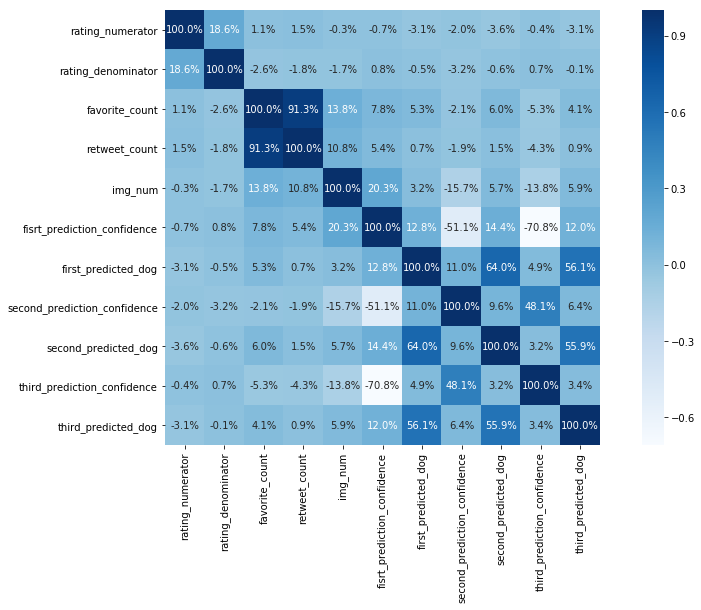

In [101]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15, 8))
sns.heatmap(df_master.corr(), cbar=True, square= True, fmt= '0.1%', annot=True, cmap= 'Blues');

From the figure above, it's obvious that there are some columns which are correlated to each other, hence there are some kind of relationship between them (Though might be a weak one). Example of such includes but not limited to:
1. retweet_count and favorite_count (~91.3% correlation)
2. firs_predicted_dog and second_predicted_dog (~64% correlation)

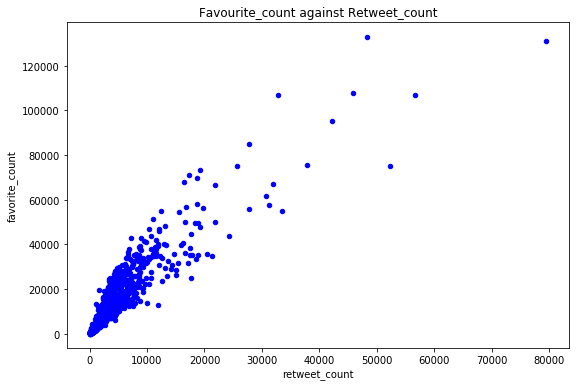

In [102]:
# Take a closer look at the retweet_count and favorite_count since they have ~91.3% correlation
df_master.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter', title = 'Favourite_count against Retweet_count', legend = True, figsize = (9,6), color = 'blue');

From the plot above, we see that favorite_count have a linearly and positively strong correlation with retweet_count

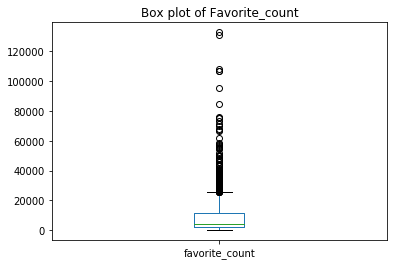

In [103]:
# Visualize the favorite_count using boxplot to inspect it's values in terms of outliers since it's of interest
df_master['favorite_count'].plot(kind = 'box', title='Box plot of Favorite_count');

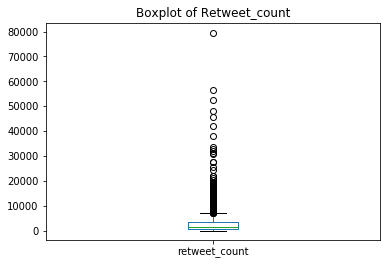

In [104]:
# Visualize the retweet_count using boxplot to inspect it's values in terms of outliers since it's of interest
df_master['retweet_count'].plot(kind = 'box', title = 'Boxplot of Retweet_count');

Obviously, we can see that both favourite and retweet count have a great number of outlier values in them

In [105]:
# Extract each month from the timestamp column of the master dataset
df_master['months'] = df_master.timestamp.dt.month.astype(int)

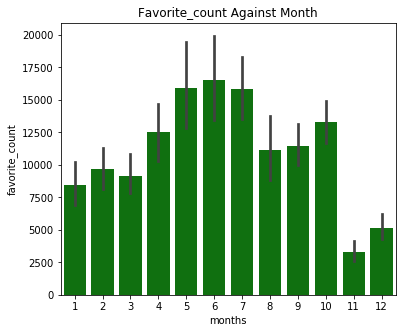

In [106]:
# visualize the favorite_count for each month
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x = df_master['months'], y = df_master['favorite_count'], color = 'g').set(title = 'Favorite_count Against Month');

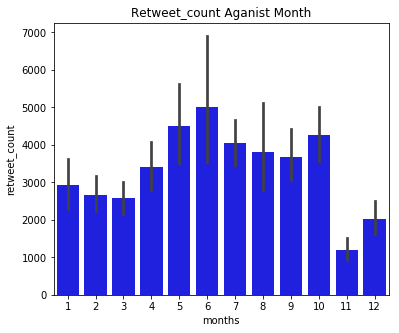

In [107]:
# visualize the retweet_count for each captured month
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x = df_master['months'], y = df_master['retweet_count'], color = 'b').set(title = 'Retweet_count Aganist Month');

In [108]:
# Extract each year from the timestamp column of the master dataset
df_master['year'] = df_master.timestamp.dt.year.astype(int)

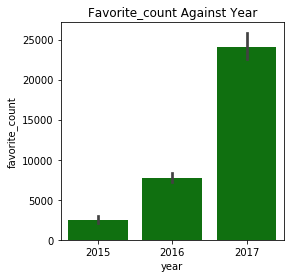

In [109]:
# visualize the favorite_count for each captured year
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = df_master['year'], y = df_master['favorite_count'], color = 'g').set(title = 'Favorite_count Against Year');

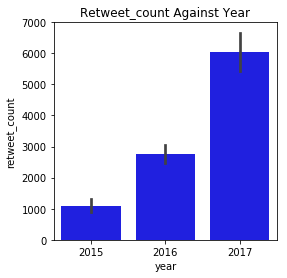

In [110]:
# visualize the Retweet_count for each captured year
fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(x = df_master['year'], y = df_master['retweet_count'], color = 'b').set(title = 'Retweet_count Against Year');

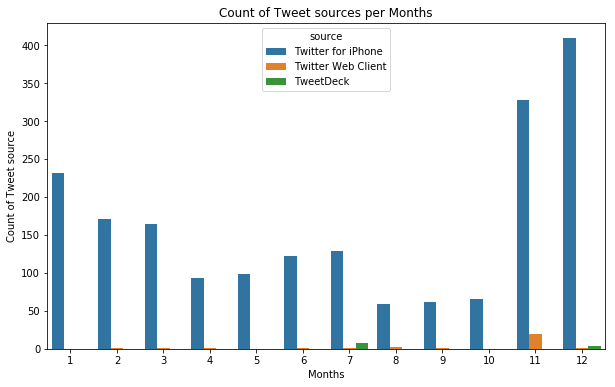

In [111]:
# Count of Tweet sources in each Months
plt.figure(figsize = (10, 6))
sns.countplot(data = df_master, x = 'months', hue = 'source')
plt.title('Count of Tweet sources per Months')
plt.xlabel('Months')
plt.ylabel('Count of Tweet source');

In [112]:
# check the count of source of the master dataset
df_master.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [113]:
# Let's check the count of source of the twitter archive enhanced dataset to compare it with the value count after the retweet values a been dropped
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Insights:
1. Since there is a strong correlation between favorit_count and retweet and the values of favorite_count is more than that of retweet_count, we can deduce that retweet_count depends on favorite_count. Hence, for a tweet to be retweeted, there's a very high tendency that it has to be first liked.

2. Most retweets and likes occurs in the month of July and in year 2017.

3. The modal source is 'Twitter for iPhone' as most raters make use of it as their tweets source and it was mostly used in the month of December. However, it's also interesting to note that all the 98 tweets made via 'Vine - Make a Scene' source are reweets. 289 retweets were done via 'Twitter for iPhones', 5 retweets was made via Twitter Web Client